In [1]:
import pandas

In [2]:
pima_indians = pandas.read_csv('pima_indians_diabetes.csv')

In [3]:
pima_indians_train = pima_indians.loc[:499,:]

In [4]:
pima_indians_validation = pima_indians.loc[500:,:]

In [5]:
pima_pos = pima_indians_train[pima_indians_train['9'] == 'pos']
pima_neg = pima_indians_train[pima_indians_train['9'] == 'neg']

In [6]:
mu1 = pima_pos.mean()
cov1 = pima_pos.cov()
mu2 = pima_neg.mean()
cov2 = pima_neg.cov()

In [7]:
from scipy.stats import multivariate_normal

In [8]:
mvn1 = multivariate_normal(mu1,cov1)
mvn2 = multivariate_normal(mu2,cov2)

In [9]:
P1 = len(pima_pos)/(len(pima_pos)+len(pima_neg))
P2 = len(pima_neg)/(len(pima_pos)+len(pima_neg))

In [10]:
P1 = (pandas.value_counts(pima_indians_train['9'])/\
    pandas.value_counts(pima_indians_train['9']).sum())['pos']
P2 = (pandas.value_counts(pima_indians_train['9'])/\
    pandas.value_counts(pima_indians_train['9']).sum())['neg']

In [11]:
pima_indians_train_X = pima_indians_train.drop('9', axis=1)


In [12]:
postnum1 = mvn1.pdf(pima_indians_train_X)*P1
postnum2 = mvn2.pdf(pima_indians_train_X)*P2
post1 = postnum1/(postnum1+postnum2)
post2 = postnum2/(postnum1+postnum2)

In [13]:
pred1 = post1>0.5
pred2 = post1>post2
pred3 = postnum1>postnum2

In [14]:
(pred1 == pred2).all() and (pred1==pred3).all() and (pred2==pred3).all()

True

In [15]:
labels = pima_indians_train['9']
labels = labels.map(lambda x: x=='pos')

In [16]:
(sum(labels==pred1)/len(labels))*100

75.4

In [17]:
pima_indians_val_X = pima_indians_validation.drop('9', axis=1)
postnum1 = mvn1.pdf(pima_indians_val_X)*P1
postnum2 = mvn2.pdf(pima_indians_val_X)*P2
post1 = postnum1/(postnum1+postnum2)
post2 = postnum2/(postnum1+postnum2)

In [18]:
pred2 = post1>post2

In [19]:
labels = pima_indians_validation['9']
labels = labels.map(lambda x: x=='pos')

In [20]:
(sum(labels==pred2)/len(labels))*100

77.98507462686567

In [ ]:
cov_shared = cov1*P1+cov2*P2

In [21]:
iris = pandas.read_csv('iris.txt', header=None)

In [25]:
iris = iris[3]

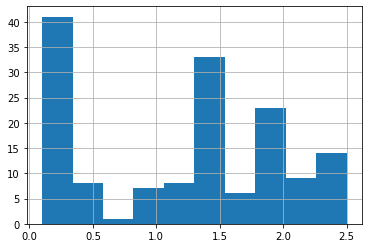

In [26]:
iris.hist(bins=10)

In [29]:
import seaborn as sns 

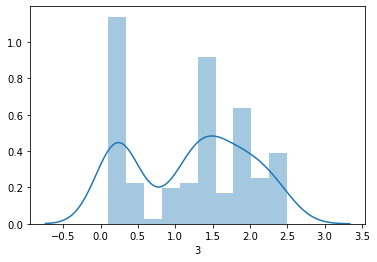

In [30]:
sns.distplot(iris, bins=10)

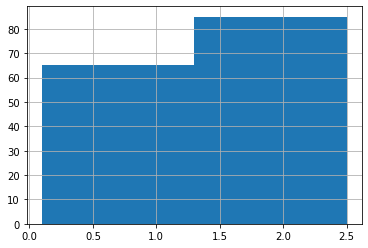

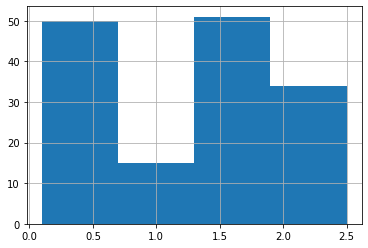

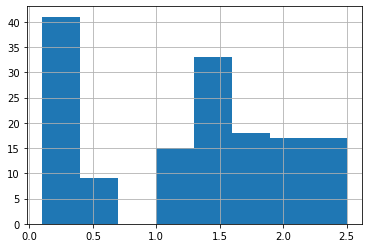

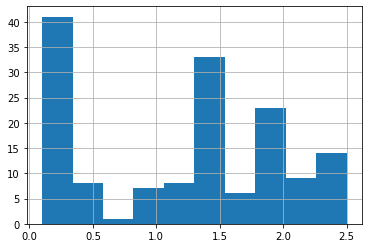

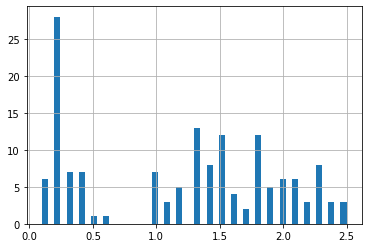

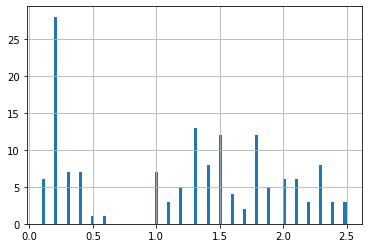

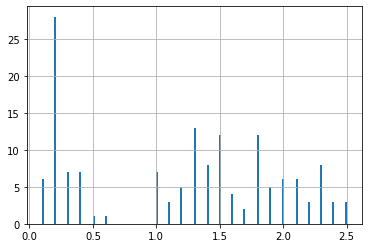

In [32]:
import matplotlib.pyplot as plt
bins = [2,4,8,10,50,100,150]
for b in bins:
    iris.hist(bins=b)
    plt.show()

In [34]:
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

In [59]:
kde = gaussian_kde(iris, bw_method=0.5)
kde2 = KernelDensity(kernel='gaussian', \
                     bandwidth=0.5).fit(np.array(iris).reshape(-1,1))

In [62]:
import numpy as np
x = np.linspace(0,2.5,1000)

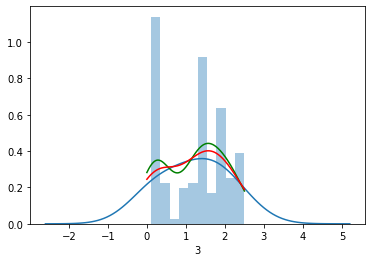

In [63]:
sns.distplot(iris,bins=10,kde_kws = {'bw':0.9})
plt.plot(x, kde(x), c='g')
plt.plot(x, np.exp(kde2.score_samples(x.reshape(-1,1))),c='r')


In [64]:
x1 = np.random.randn(30,1)
x2 = 5+np.random.randn(30,1)

In [66]:
x = np.vstack((x1,x2))

In [71]:
import scipy.stats

In [72]:
hist = np.histogram(x, bins=20)
hist_dist = scipy.stats.rv_histogram(hist)

In [73]:
class NormalPdf:
    def __init__(self,mu, std):
        self.mu = mu
        self.std = std
        
    def __call__(self,x):
        diff = (x - self.mu)*(x-self.mu)
        return 1/(np.sqrt(2*np.pi)*self.std) \
                * np.exp(-(diff/(2*self.std*self.std)))

In [74]:
class MixtureOfGaussians:
    def __init__(self, gaussians, priors = None):
        self._gaussians = gaussians
        self._priors = priors if priors is not None\
                        else [1/len(gaussians)]*len(gaussians)
    
    def __call__(self, x):
        return sum([self._priors[i]*self._gaussians[i](x)\
                    for i in range(len(self._gaussians))])

In [75]:
gaussians = [NormalPdf(0,1), NormalPdf(5,1)]
MM = MixtureOfGaussians(gaussians)

In [79]:
x_in = np.linspace(min(x), max(x),100)

In [109]:
def kl_divergence(p,q,x):
    return np.sum(p(x)*np.log(p(x)/np.maximum(q(x),1e-15)))

In [103]:
kde = gaussian_kde(x.reshape(-1))

(100, 1)

In [105]:
kde2 =gaussian_kde(x.reshape(-1),bw_method=kde.factor/2)

In [113]:
print("hist divergence: ",kl_divergence(MM, hist_dist.pdf, x_in))
print("kde divergence: ",kl_divergence(MM, kde, x_in.reshape(-1)))
print("kde2 divergence: ",kl_divergence(MM, kde2, x_in.reshape(-1)))

hist divergence:  15.155772415653065
kde divergence:  2.2396170490621436
kde2 divergence:  0.7767908317550101


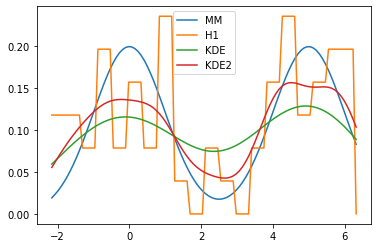

In [118]:
plt.plot(x_in, MM(x_in), label="MM")
plt.plot(x_in, hist_dist.pdf(x_in),label="H1")
plt.plot(x_in, kde(x_in.reshape(-1)),label="KDE")
plt.plot(x_in, kde2(x_in.reshape(-1)),label="KDE2")
plt.legend()